In [1]:
from ltlcross_wrapper import ResAnalyzer, gather_cumulative, gather_mins

In [2]:
nd_benchmarks = {}
for name in ["literature_nd","random_nd"]:
    b = ResAnalyzer(f"data/{name}.csv", cols=["states","time","acc","transitions"])
    nd_benchmarks[name] = b

In [3]:
tool_set = ["yes.seminator#def","yes.seminator-1-1","yes.seminator-1-2","yes.owl#a"]

For each benchmark, we list the cumulative numbers of states for each tool. `yes` in the name of tools means that the Spot simplifications were applied on the results of the tools (were not disabled for `seminator`). `#a` is the default setting of Owl, `#def` is the default setting of Seminator 2. `-1-1` and `-1-2` indicate older version numbers of `seminator`. If you want to see numbers where Spot's simplifications were disabled (not run for Owl) set tool_set to `None`. If you do, the `#a` stands for `ltl2ldgba -a` and analogously for `#s`. For `seminator`, by `#tba` (and analogies) we denote `seminator --via-tba` etc.

In [4]:
gather_cumulative(nd_benchmarks, tool_set=tool_set)

,literature_nd,random_nd
tool,,
yes.owl#a,250,4675
yes.seminator#def,230,3963
yes.seminator-1-1,297,7024
yes.seminator-1-2,238,4532


### Minimal automata

The following table shows for how many formulas each tool produces automaton that has the smallest number of states. The minimum ranges over the considered tools. The number in min hits shows how many times the same size as the smallest automaton was achieved. The number in unique min hits counts only cases where the given tool is the only tool with such a small automaton.

In [5]:
gather_mins(nd_benchmarks, tool_set=tool_set)

### Running times and timeouts
The older versions of Seminator reached the 30s timeout in one case for formulae from literature. Otherwise, most of the execution times were below 1s for all tools.

In [6]:
for name, b in nd_benchmarks.items():
    print(name)
    display(b.get_error_counts())
    display(b.values.time.max().loc[tool_set])

literature_nd


,timeout,parse error,incorrect,crash,no output
yes.seminator-1-1,1,0,0,0,0
yes.seminator-1-2,1,0,0,0,0


tool
yes.seminator#def     0.076844
yes.seminator-1-1    30.003500
yes.seminator-1-2    30.000500
yes.owl#a             0.123179
dtype: float64

random_nd


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
yes.seminator#def    0.288713
yes.seminator-1-1    5.685760
yes.seminator-1-2    0.450692
yes.owl#a            1.599630
dtype: float64

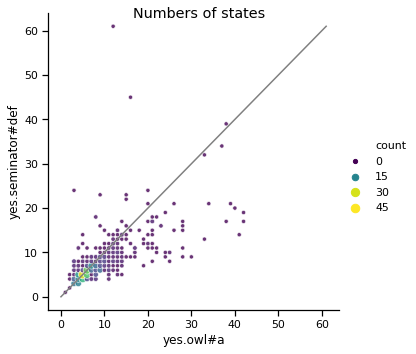

In [7]:
b.seaborn_scatter_plot("yes.owl#a","yes.seminator#def", include_equal=True)

In [8]:
for n, b in nd_benchmarks.items():
    print(n)
    display(b.cross_compare(tool_set=tool_set))

literature_nd


,yes.seminator#def,yes.seminator-1-1,yes.seminator-1-2,yes.owl#a,V
yes.seminator#def,nan,12,8,13,33
yes.seminator-1-1,7,nan,0,4,11
yes.seminator-1-2,10,9,nan,11,30
yes.owl#a,7,15,8,nan,30


random_nd


,yes.seminator#def,yes.seminator-1-1,yes.seminator-1-2,yes.owl#a,V
yes.seminator#def,nan,426,252,352,1030
yes.seminator-1-1,45,nan,24,163,232
yes.seminator-1-2,149,327,nan,322,798
yes.owl#a,132,329,168,nan,629
